In [1]:
import pathlib
import random

import torch

import training.dataset
import training.vis
import training.util
import training.loss
import training.run
import training.history

from model.model import E2VID

name = training.util.generate_random_name()

random.seed(42)
torch.manual_seed(42)

device = torch.device("cuda")
data = training.dataset.Loaders.from_path(
    pathlib.Path("../out/"), 
    device=device, 
    preload=True, 
    cache_size=30,
    percentage=(0.8, 0.1, 0.1),
    drop_percentage=0.98,
    num_workers=0
)

In [2]:
model = E2VID(config={"num_bins": 6}).to(device)
loss = training.loss.SSIMLoss(n_channels=1).to(device)
optim = torch.optim.Adam(model.parameters(), lr=1e-3) # type: ignore

Using UpsampleConvLayer (slow, but no checkerboard artefacts)


In [3]:
history = training.history.History(name, output_dir=pathlib.Path("./history/"))
runner = training.run.Runner(model, optimizer=optim, criterion=loss, history=history)
# runner.train(data.train, data.val, epochs=10)

TypeError: Invalid shape (336,) for image data

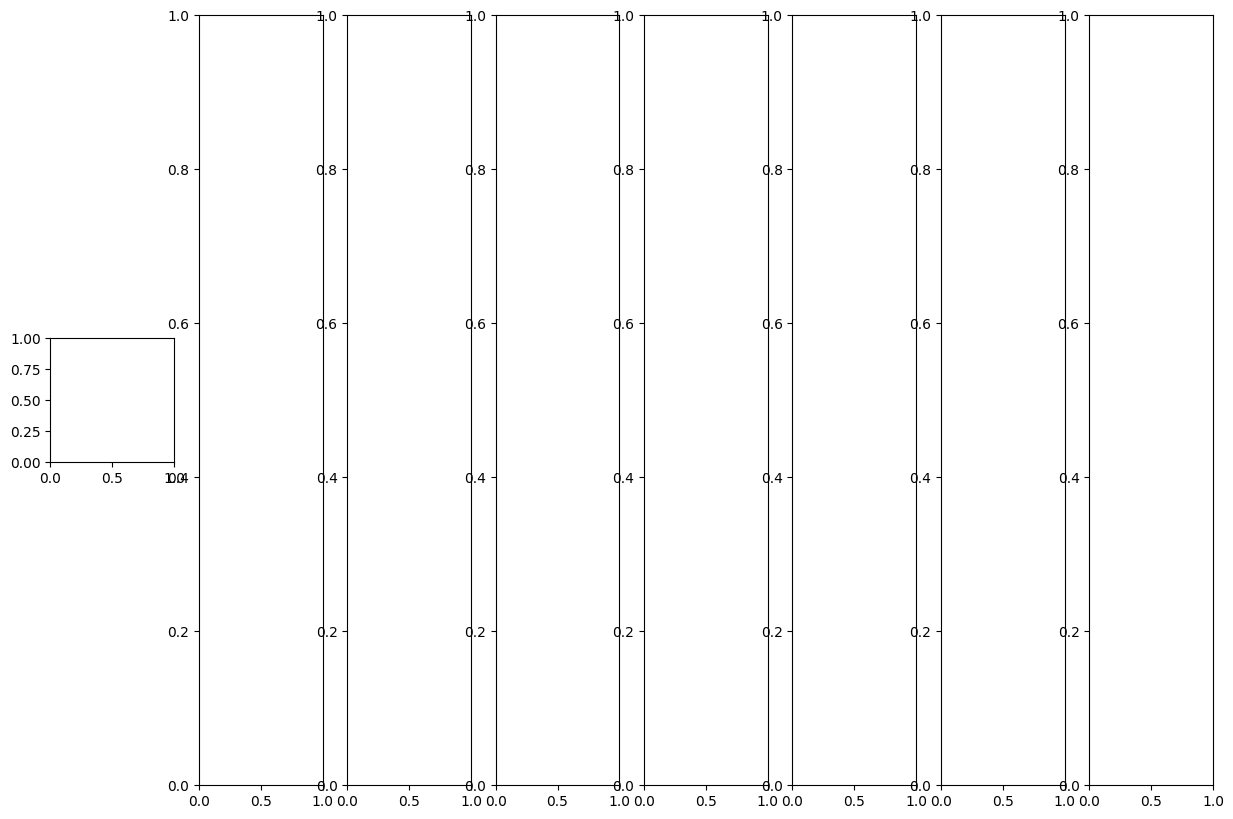

In [4]:
runner._on_epoch_end(0, data.val)